In [1]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git
!pip install -q ipython

1.11.0+cpu


In [2]:
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Helper function for visualization.
%matplotlib inline
import networkx as nx

## Creating simple graph using pytorch geometric

Reference : https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html

A single graph in PyG is described by an instance of **torch_geometric.data.Data**, which holds the following attributes by default:

    data.x: Node feature matrix with shape [num_nodes, num_node_features]

    data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long

    data.edge_attr: Edge feature matrix with shape [num_edges, num_edge_features]

    data.y: Target to train against (may have arbitrary shape), e.g., node-level targets of shape [num_nodes, *] or graph-level targets of shape [1, *]

    data.pos: Node position matrix with shape [num_nodes, num_dimensions]
    
Now let's a simple undirected graph with 3 nodes and edges as shown in the below image.

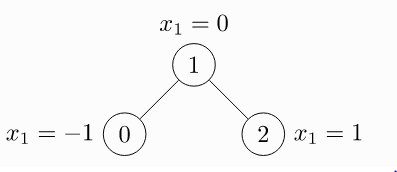

In [3]:
from IPython.display import Image
Image(filename='../input/pyg-image/example1.png')

../input/pyg-image

In [4]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)

In [5]:
print(data)

Data(x=[3, 1], edge_index=[2, 4])


Edge index is nothing but building the connection between the nodes , in this way of defining first we show the connection between the nodes i.e. 0-1 , 1-2 and as it's a undirected graph we also have to put the reverse ordering. 

There is a different way of defining the edge index where we have to transpose and call contiguous on it before passing them to the data constructor.

In [6]:
edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)

data = Data(x=x, edge_index=edge_index.t().contiguous())

print(data)

Data(x=[3, 1], edge_index=[2, 4])


## Utility functions to check graph properties

In [7]:
print(data.keys)

print('\n Graph has self loops ? ' , data.contains_self_loops())

print('\n Node feature matrix : ' , data.x)

print('\n No of Nodes :' , data.num_nodes)

print('\n No of Edges : ' , data.num_edges)

print('\n No of node features :' , data.num_node_features)

print('\n Is graph directed ? ' , data.is_directed())

['edge_index', 'x']

 Graph has self loops ?  False

 Node feature matrix :  tensor([[-1.],
        [ 0.],
        [ 1.]])

 No of Nodes : 3

 No of Edges :  4

 No of node features : 1

 Is graph directed ?  False


[Pytorch geometric](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) has lot of datasets to explore and learn about graph dataset. 

Let's look into Zachary’s karate club network from the “An Information Flow Model for Conflict and Fission in Small Groups” paper, containing 34 nodes, connected by 156 (undirected and unweighted) edges. Every node is labeled by one of four classes obtained.

In [8]:
from torch_geometric.datasets import KarateClub

In [9]:
data = KarateClub()
print(f'Dataset: {data}:')
print('======================')
print(f'Number of graphs: {len(data)}')
print(f'Number of features: {data.num_features}')
print(f'Number of classes: {data.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


In [11]:
data[0]

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])

we can see that this dataset holds exactly **one graph**, and that each node in this dataset is assigned a **34-dimensional feature vector** (which uniquely describes the members of the karate club).
Furthermore, the graph holds exactly **4 classes**, which represent the community each node belongs to.

In [12]:
data = data[0]  # Get the first graph object.

print(data)
print('==============================================================')

# some properties about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')

print(f'Number of training nodes: {data.train_mask.sum()}')

print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Number of training nodes: 4
Has self-loops: False
Is undirected: True


In [15]:
#  node features as x (each of the 34 nodes is assigned a 34-dim feature vector)
data.x.shape

torch.Size([34, 34])

In [16]:
data.x[0]

tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
# node labels
data.y.unique()

tensor([0, 1, 2, 3])

In [21]:
# edge index details 
print(data.edge_index.t())

torch.Size([4, 2])
tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [

This representation is known as the **COO format (coordinate format)** , Importantly, PyG does not distinguish between directed and undirected graphs, and treats undirected 
graphs as a special case of directed graphs in which reverse edges exist for every entry in `edge_index`.

In [22]:
def visualize_graph(G, color):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

## Visualize the graph

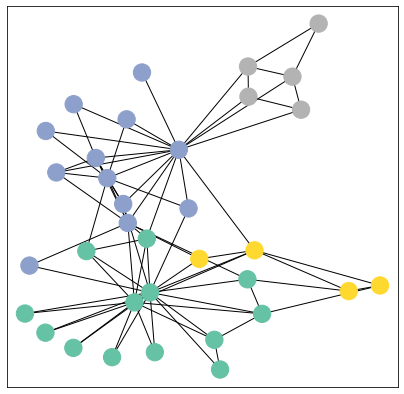

In [23]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize_graph(G, color=data.y)